In [1]:
!pip install -q qiskit
!pip install -q qiskit-aer
!pip install -q pylatexenc

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 55.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 73.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 84.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [2]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
import numpy as np
import matplotlib.pyplot as plt
from qiskit.visualization import plot_histogram
import random

1. Implementing QFT

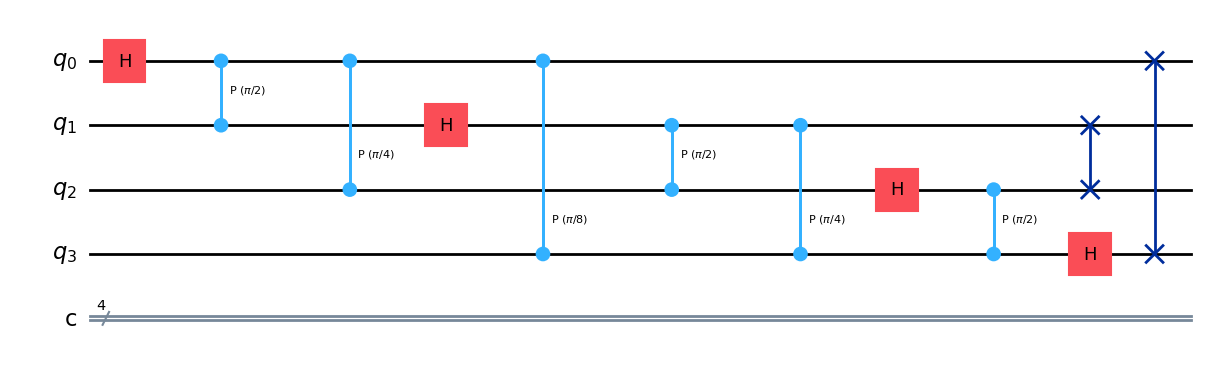

In [3]:
n = 4
qc = QuantumCircuit(n,n)
from math import pi

for i in range(n):
  qc.h(i)
  for j in range(i+1,n):
    qc.cp(pi/(2**(j-i)),j,i)

for i in range(int(n/2)):
  qc.swap(i,n-i-1)

qc.draw(output = 'mpl')

In [4]:
from qiskit.quantum_info import Statevector

state = Statevector.from_label('0010')
final_state = state.evolve(qc)

print("\nQFT Output Statevector:")
for i, amp in enumerate(final_state.data):
    print(f"|{i:0{n}b}⟩: amplitude = {amp:.4f}")



QFT Output Statevector:
|0000⟩: amplitude = 0.2500+0.0000j
|0001⟩: amplitude = 0.2500+0.0000j
|0010⟩: amplitude = 0.2500+0.0000j
|0011⟩: amplitude = 0.2500+0.0000j
|0100⟩: amplitude = -0.2500+0.0000j
|0101⟩: amplitude = -0.2500+0.0000j
|0110⟩: amplitude = -0.2500+0.0000j
|0111⟩: amplitude = -0.2500+0.0000j
|1000⟩: amplitude = 0.0000+0.2500j
|1001⟩: amplitude = 0.0000+0.2500j
|1010⟩: amplitude = 0.0000+0.2500j
|1011⟩: amplitude = 0.0000+0.2500j
|1100⟩: amplitude = -0.0000-0.2500j
|1101⟩: amplitude = -0.0000-0.2500j
|1110⟩: amplitude = -0.0000-0.2500j
|1111⟩: amplitude = -0.0000-0.2500j


2. Implementing inverse QFT

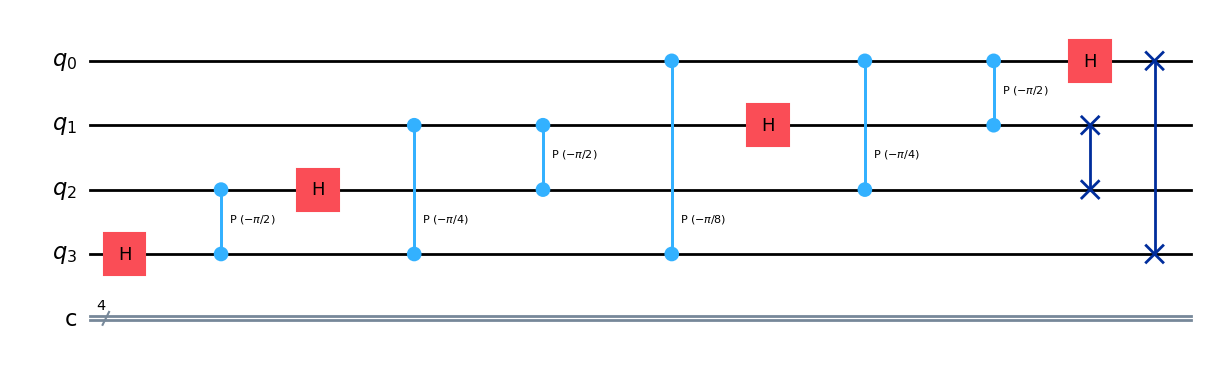

In [5]:
qc2 = QuantumCircuit(n,n)

for i in reversed(range(n)):
    for j in reversed(range(i+1, n)):
        qc2.cp(-pi / (2**(j - i)), j, i)  # negative angle for inverse
    qc2.h(i)

for i in range(int(n/2)):
  qc2.swap(i,n-i-1)

qc2.draw(output = 'mpl')

In [6]:
state = Statevector.from_label('0010')
final_state = final_state.evolve(qc2)
print("\nInverse QFT Output Statevector:")
for i, amp in enumerate(final_state.data):
    print(f"|{i:0{n}b}⟩: amplitude = {amp:.4f}")


Inverse QFT Output Statevector:
|0000⟩: amplitude = 0.0000+0.0000j
|0001⟩: amplitude = 0.3767-0.2517j
|0010⟩: amplitude = 0.4268-0.1768j
|0011⟩: amplitude = -0.1560+0.0310j
|0100⟩: amplitude = 0.0000-0.0000j
|0101⟩: amplitude = 0.1043+0.0207j
|0110⟩: amplitude = 0.1768+0.0732j
|0111⟩: amplitude = -0.0749-0.0501j
|1000⟩: amplitude = -0.0000-0.0000j
|1001⟩: amplitude = 0.0501+0.0749j
|1010⟩: amplitude = 0.0732+0.1768j
|1011⟩: amplitude = -0.0207-0.1043j
|1100⟩: amplitude = -0.0000+0.0000j
|1101⟩: amplitude = -0.0310+0.1560j
|1110⟩: amplitude = -0.1768+0.4268j
|1111⟩: amplitude = 0.2517-0.3767j


In [7]:
init = QuantumCircuit(n)
full = init.compose(qc).compose(qc2)

# Final statevector after QFT + iQFT
final_state = Statevector.from_instruction(full)
print("\nFinal Statevector:")
for i, amp in enumerate(final_state.data):
    print(f"|{i:0{n}b}⟩: amplitude = {amp:.4f}")


Final Statevector:
|0000⟩: amplitude = 1.0000+0.0000j
|0001⟩: amplitude = 0.0000-0.0000j
|0010⟩: amplitude = 0.0000-0.0000j
|0011⟩: amplitude = 0.0000-0.0000j
|0100⟩: amplitude = -0.0000+0.0000j
|0101⟩: amplitude = 0.0000-0.0000j
|0110⟩: amplitude = 0.0000-0.0000j
|0111⟩: amplitude = 0.0000-0.0000j
|1000⟩: amplitude = -0.0000+0.0000j
|1001⟩: amplitude = 0.0000+0.0000j
|1010⟩: amplitude = 0.0000+0.0000j
|1011⟩: amplitude = 0.0000+0.0000j
|1100⟩: amplitude = -0.0000-0.0000j
|1101⟩: amplitude = 0.0000+0.0000j
|1110⟩: amplitude = 0.0000+0.0000j
|1111⟩: amplitude = 0.0000+0.0000j


3. Implementing QPE

/tmp/ipython-input-11-891765823.py:24: DeprecationWarning: The class ``qiskit.circuit.library.basis_change.qft.QFT`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. ('Use qiskit.circuit.library.QFTGate or qiskit.synthesis.qft.synth_qft_full instead, for access to all previous arguments.',)
  qft = QFT(t, inverse=True, do_swaps=True).to_gate()


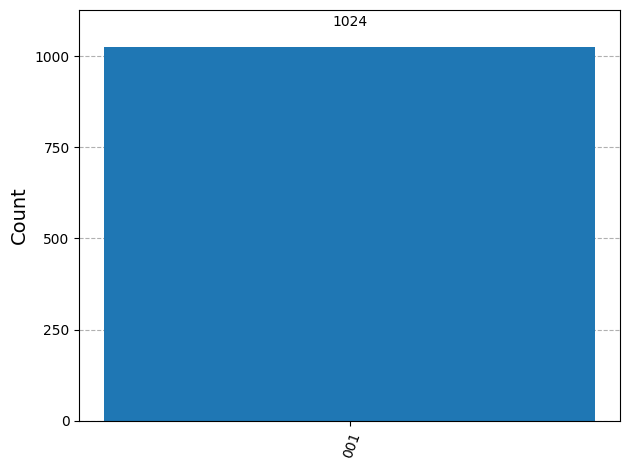

In [11]:
from qiskit.circuit import QuantumCircuit

t = 3  #number of control qubits
n = 1  #number of target qubit

qc3 = QuantumCircuit(t + n, t)

qc3.h(range(t)) #applying Hadamard to all control qubit

qc3.x(t) #flipping last qubit

#applying controlled U gates
theta = 0.125
U = QuantumCircuit(1)
U.p(2 * pi * theta, 0) #unitary with known phase shift

for i in range(t):
    power = 2**i
    powered_U = U.power(power)
    controlled_U = powered_U.control()
    qc3.append(controlled_U, [i, t])  #control on qubit i, target on qubit t

#applying inverse QFT
qft = QFT(t, inverse=True, do_swaps=True).to_gate()
qc3.append(qft, range(t))

qc3.measure(range(t), range(t))

qc3 = qc3.decompose(reps=10)  #decomposes all custom gates, which the AER simulator cannot process

sim = AerSimulator()
result = sim.run(qc3, shots=1024).result()
counts = result.get_counts()

#plotting the result
plot_histogram(counts)


4. Implementing SHORs algorithm